# Center of Mass and Planar Moment of Inertia of a Right Triangle

In [1]:
from sympyhelpers.sympyhelpers import *
from sympy import init_printing
init_printing()

We have a right triangle of height $h$ and width $w$. We define a body-fixed frame $\mathcal{B} = (O, \mathbf{\hat{b}}_1,\mathbf{\hat{b}}_2, \mathbf{\hat{b}}_3)$ such that $\mathbf{\hat{b}}_1$ is parallel to the base of the triangle, $\mathbf{\hat{b}}_2$ is parallel to the height, and $\mathbf{\hat{b}}_3$ is orthogonal to the surface of the triangle.  First, we fine the location of the center of mass. We will set our coordinate origin in the bottom, right-hand corner of the triangle (at the right angle) and describe the position of each mass element as: $\mathbf r_{\mathrm{d}{m}/O} = x \mathbf{\hat{b}}_1 + y \mathbf{\hat{b}}_2$


In [2]:
m,h,w = symbols("m,h,w", positive=True)
x,y = symbols("x,y", real=True)

In [3]:
# position of one mass element with respect to triangle corner in B frame components:
r_dmO = Matrix([x,y,0])
mat2vec(r_dmO)

We must not integrate over the limits of the body.  $x$ goes from 0 to $w$ whereas $y$ goes from 0 to $h - \frac{h}{w}x$. Since the $y$ limit has an  $x$ dependence, we must integrate over it first.

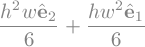

In [4]:
tmp = integrate(integrate(r_dmO,(y, 0,h - h/w*x)), (x, 0 ,w))
mat2vec(tmp)

Finally, we need to scale this by the areal density over the mass, which in this case equals $\frac{2}{hw}$:

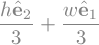

In [5]:
r_GO = 2/h/w*tmp
mat2vec(r_GO)

At this point, we could redefine our coordinates to be with respect to the center of mass, but it is actually easier to keep the original $x$ and $y$  definitions, as we then do not need to change our limits of integration for computing the MOI

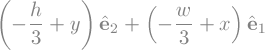

In [6]:
# define location of mass element wrt COM:
r_dmG = r_dmO-r_GO
mat2vec(r_dmG)

We now need to integrate over $\Vert \mathbf{r}_{\mathrm{d}m/G} \Vert^2$


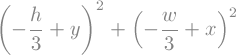

In [7]:
r_dmG2 = r_dmG.dot(r_dmG)
r_dmG2

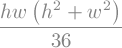

In [8]:
tmp2 = integrate(integrate(r_dmG2,(y, 0,h - h/w*x)), (x, 0 ,w))
simplify(tmp2)

Finally, we scale this by the areal density:

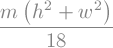

In [9]:
I_G = simplify(m/(h*w/2)*tmp2)
I_G